In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df_explo = pd.read_csv('df_explo.csv') 
df_explo = pd.read_csv("/content/drive/MyDrive/Explo_Dataset/df_explo.csv")

In [ ]:
df_explo.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
df_explo = df_explo.drop(columns="Unnamed: 0")

In [ ]:
df_explo.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [ ]:
y = df_explo.iloc[:,0].values
X = df_explo.iloc[:,1:].values

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
n_classes = y.shape[1]

In [ ]:
n_classes

8

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0)))])

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LinearSVC()))])

In [ ]:
from sklearn import tree

In [ ]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(tree.DecisionTreeClassifier()))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=10)))])

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [ ]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(mlp))])

# Logistic Regression

In [ ]:
pipe_lr = pipe_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
y_score_lr = pipe_lr.decision_function(X_test)

In [ ]:
y_score_lr

array([[-40.64820981, -15.20018535, -26.3696608 , ...,  -5.41419795,
        -24.64889957,   6.61528567],
       [ -5.11630062, -20.44905642, -22.39620019, ...,  -7.89225252,
         -8.48823566,   4.03245409],
       [ -8.17676249, -13.71499458, -10.95258143, ...,  -6.47704396,
         -9.68082168,   6.51574589],
       ...,
       [-36.96374777, -13.29301778, -14.27828033, ...,  -7.56575431,
        -21.6027136 ,   4.14261761],
       [-58.92085481, -11.02865516,  -7.980167  , ..., -13.12090979,
        -20.00156062,   5.49315955],
       [-27.20946161, -12.16001476, -19.77124181, ...,  -6.6129637 ,
        -18.61837558,   3.93255002]])

In [ ]:
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

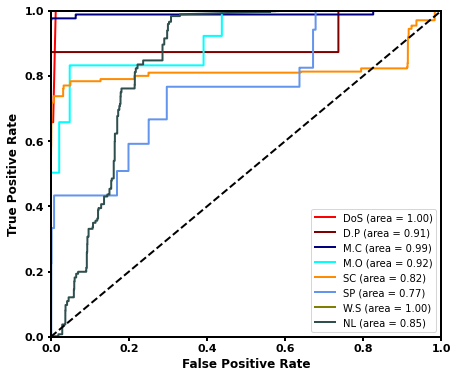

In [ ]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Logistic_Regression")

# Random Forest

In [ ]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)

In [ ]:
y_score_rnd = pipe_rnd.predict_proba(X_test)
fpr_rnd = dict()
tpr_rnd = dict()
roc_auc_rnd = dict()
for i in range(n_classes):
    fpr_rnd[i], tpr_rnd[i], _ = roc_curve(y_test[:, i], y_score_rnd[:, i])
    roc_auc_rnd[i] = auc(fpr_rnd[i], tpr_rnd[i])

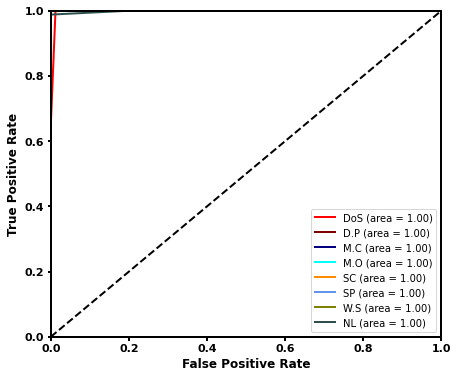

In [ ]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rnd[i], tpr_rnd[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_rnd[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Random_Forrest")

# ANN

In [ ]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)

Iteration 1, loss = 0.01747635
Iteration 2, loss = 0.01242359
Iteration 3, loss = 0.01219138
Iteration 4, loss = 0.01213977
Iteration 5, loss = 0.01206942
Iteration 6, loss = 0.01195333
Iteration 7, loss = 0.01190263
Iteration 8, loss = 0.01188070
Iteration 9, loss = 0.01179250
Iteration 10, loss = 0.01184380
Iteration 11, loss = 0.01180049
Iteration 12, loss = 0.01182816
Iteration 13, loss = 0.01178547
Iteration 14, loss = 0.01173279
Iteration 15, loss = 0.01179253
Iteration 16, loss = 0.01172668
Iteration 17, loss = 0.01173873
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.00544625
Iteration 2, loss = 0.00202050
Iteration 3, loss = 0.00149718
Iteration 4, loss = 0.00114145
Iteration 5, loss = 0.00089673
Iteration 6, loss = 0.00071281
Iteration 7, loss = 0.00055928
Iteration 8, loss = 0.00044291
Iteration 9, loss = 0.00035870
Iteration 10, loss = 0.00029026
Iteration 11, loss = 0.00023988
Iteration 12, loss = 0.00021063


In [ ]:
y_score_mlp = pipe_mlp.predict_proba(X_test)
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

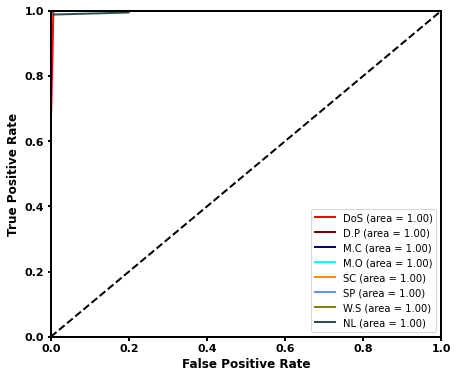

In [ ]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_mlp[i], tpr_mlp[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_mlp[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_MLP")